In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

print('Numpy version: ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

rcParams['figure.figsize'] = 10, 7
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

Numpy version:  1.23.5
pandas version :  1.5.3
seaborn version :  0.12.2


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv('SBAnational.csv', low_memory=False)
pd.set_option('display.max_columns', None)
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


## <b>1. Descriptive Statistics</b>

<b>A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?</b>

In [ ]:
## Cek tipe data setiap feature

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [ ]:
df['NewExist'].value_counts()

1.0    644869
2.0    253125
0.0      1034
Name: NewExist, dtype: int64

In [ ]:
df['UrbanRural'].value_counts()

1    470654
0    323167
2    105343
Name: UrbanRural, dtype: int64

In [ ]:
df['Zip'].value_counts()

10001    933
90015    926
93401    806
90010    733
33166    671
        ... 
33789      1
32524      1
61870      1
97711      1
26134      1
Name: Zip, Length: 33611, dtype: int64

## Tipe Data Kurang Sesuai


*   Tipe data DisbursementGross, BalanceGross, ChgOffPrinGr, GrAppv, SBA_Appv seharusnya **float** karna merupakan nominal angka
*   Tipe data UrbanRural dan Zip seharusnya **string** karna walaupun bentuknya angka, tetapi tidak dapat digunakan untuk proses perhitungan
*   Tipe data NewExist seharusnya **integer** karna termasuk binari 
*   Tipe data ApprovalFY seharusnya **datetime**


In [ ]:
## Value RevLineCr Yaitu 'Y' dan 'N'
df['RevLineCr'].value_counts()

N    420288
0    257602
Y    201397
T     15284
1        23
R        14
`        11
2         6
C         2
3         1
,         1
7         1
A         1
5         1
.         1
4         1
-         1
Q         1
Name: RevLineCr, dtype: int64

In [ ]:
RevLineCr_perc = len(df[~df['RevLineCr'].isin(['Y', 'N'])]) / len(df['RevLineCr']) * 100
print('Persentase yang tidak sesuai dengan "Y" dan "N" sebanyak', round((RevLineCr_perc),2),'%')

Persentase yang tidak sesuai dengan "Y" dan "N" sebanyak 30.86 %


In [ ]:
## Value LowDoc yaitu 'Y' dan 'N'
df['LowDoc'].value_counts()

N    782822
Y    110335
0      1491
C       758
S       603
A       497
R        75
1         1
Name: LowDoc, dtype: int64

In [ ]:
LowDoc_perc = len(df[~df['LowDoc'].isin(['Y', 'N'])]) / len(df['LowDoc']) * 100
print('Persentase yang tidak sesuai dengan "Y" dan "N" sebanyak', round((LowDoc_perc),2),'%')

Persentase yang tidak sesuai dengan "Y" dan "N" sebanyak 0.67 %


In [ ]:
## Value NewExist Yaitu 1.0(Existing Business) dan 2.0(New Business)
df['NewExist'].value_counts()

1.0    644869
2.0    253125
0.0      1034
Name: NewExist, dtype: int64

In [ ]:
NewExist_perc = len(df[~df['NewExist'].isin([1.0,2.0])]) / len(df['NewExist']) * 100
print('Persentase yang tidak sesuai dengan "1.0" dan "2.0" sebanyak', round((NewExist_perc),2),'%')

Persentase yang tidak sesuai dengan "1.0" dan "2.0" sebanyak 0.13 %


In [ ]:
## Value UrbanRural yaitu '1 = Urban' dan '2 = Rural'
df['UrbanRural'].value_counts()

1    470654
0    323167
2    105343
Name: UrbanRural, dtype: int64

In [ ]:
UrbanRural_perc = len(df[~df['UrbanRural'].isin([1, 2])]) / len(df['UrbanRural']) * 100
print('Persentase yang tidak sesuai dengan "1" dan "2" sebanyak', round((UrbanRural_perc),2),'%')

Persentase yang tidak sesuai dengan "1" dan "2" sebanyak 35.94 %


In [ ]:
df['MIS_Status'].value_counts()

P I F     739609
CHGOFF    157558
Name: MIS_Status, dtype: int64

In [ ]:
df['ApprovalFY'].unique()

array(['1997', '1980', '2006', '1998', '1999', '2000', '2001', '1972',
       '2003', '2004', '1978', '1979', '1981', '2005', '1962', '1982',
       '1965', '1966', '1983', '1973', '1984', '2007', '1985', '1986',
       '1987', '2008', '1988', '2009', '1989', '1991', '1990', '1974',
       '2010', '1967', '2011', '1992', '1993', '2002', '2012', '2013',
       '1994', '2014', '1975', '1977', '1976', '1968', '1976A', '1969',
       '1995', '1970', '1996', '1971'], dtype=object)

In [ ]:
df['NAICS']

0         451120
1         722410
2         621210
3              0
4              0
           ...  
899159    451120
899160    451130
899161    332321
899162         0
899163         0
Name: NAICS, Length: 899164, dtype: int64

## Value kurang Sesuai




*   RevLineCr dan LowDoc terdapat value yang kurang sesuai, seharusnya value bernilai **Y dan N yang melambangkan Yes dan No**
*   UrbanRural terdapat value yang kurang tepat yang seharusnya Urban dan Rural, tetapi ada satu kategori lagi yaitu **Undefined**
*   ApprovalFY terdapat value yang kurang tepat yaitu **1976A**






In [ ]:
df.isna().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [ ]:
round((df.isnull().sum()/len(df)* 100), 5)

LoanNr_ChkDgt         0.00000
Name                  0.00156
City                  0.00334
State                 0.00156
Zip                   0.00000
Bank                  0.17338
BankState             0.17416
NAICS                 0.00000
ApprovalDate          0.00000
ApprovalFY            0.00000
Term                  0.00000
NoEmp                 0.00000
NewExist              0.01513
CreateJob             0.00000
RetainedJob           0.00000
FranchiseCode         0.00000
UrbanRural            0.00000
RevLineCr             0.50358
LowDoc                0.28716
ChgOffDate           81.90553
DisbursementDate      0.26336
DisbursementGross     0.00000
BalanceGross          0.00000
MIS_Status            0.22210
ChgOffPrinGr          0.00000
GrAppv                0.00000
SBA_Appv              0.00000
dtype: float64

## Jumlah kolom yang memiliki nilai kosong

*   Terdapat 11 kolom yang memiliki nilai null yaitu **Name, City, Zip, Bank, BankState, NewExist, RevLineCr, LowDoc, ChgOffDate, DisbursementDate, MIS_Status**



In [ ]:
Numerical = ['LoanNr_ChkDgt', 'Zip', 'NAICS', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob',
             'FranchiseCode', 'UrbanRural'
            ]
Categorical = ['Name', 'City', 'State','Bank', 'BankState', 'ApprovalDate', 'ApprovalFY', 'NewExist',
               'RevLineCr', 'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
               'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'
              ]

In [ ]:
df[Numerical].describe()

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,8.991640e+05,899164.000000,899164.000000,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,899164.000000
mean,4.772612e+09,53804.391241,398660.950146,110.773078,11.411353,1.280404,8.430376,10.797257,2753.725933,0.757748
std,2.538175e+09,31184.159152,263318.312760,78.857305,74.108196,0.451750,236.688165,237.120600,12758.019136,0.646436
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.589758e+09,27587.000000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.361439e+09,55410.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,6.904627e+09,83704.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,9.996003e+09,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


In [ ]:
df[Categorical].describe()

,NewExist
count,899028.000000
mean,1.280404
std,0.451750
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000


In [52]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LoanNr_ChkDgt,899164.0,4.772612e+09,2.538175e+09,1.000014e+09,2.589758e+09,4.361439e+09,6.904627e+09,9.996003e+09
Zip,899164.0,5.380439e+04,3.118416e+04,0.000000e+00,2.758700e+04,5.541000e+04,8.370400e+04,9.999900e+04
NAICS,899164.0,3.986610e+05,2.633183e+05,0.000000e+00,2.352100e+05,4.453100e+05,5.617300e+05,9.281200e+05
Term,899164.0,1.107731e+02,7.885731e+01,0.000000e+00,6.000000e+01,8.400000e+01,1.200000e+02,5.690000e+02
NoEmp,899164.0,1.141135e+01,7.410820e+01,0.000000e+00,2.000000e+00,4.000000e+00,1.000000e+01,9.999000e+03
NewExist,899028.0,1.280404e+00,4.517500e-01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
CreateJob,899164.0,8.430376e+00,2.366882e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,8.800000e+03
RetainedJob,899164.0,1.079726e+01,2.371206e+02,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,9.500000e+03
FranchiseCode,899164.0,2.753726e+03,1.275802e+04,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.999900e+04
UrbanRural,899164.0,7.577483e-01,6.464360e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00


## Apakah ada kolom yang memiliki summary agak aneh? (mean, median, min, max, top, unique, freq)


*   Sebagian besar kolom tampaknya skew ke kanan, karna mean > median



## Univariate Analysis

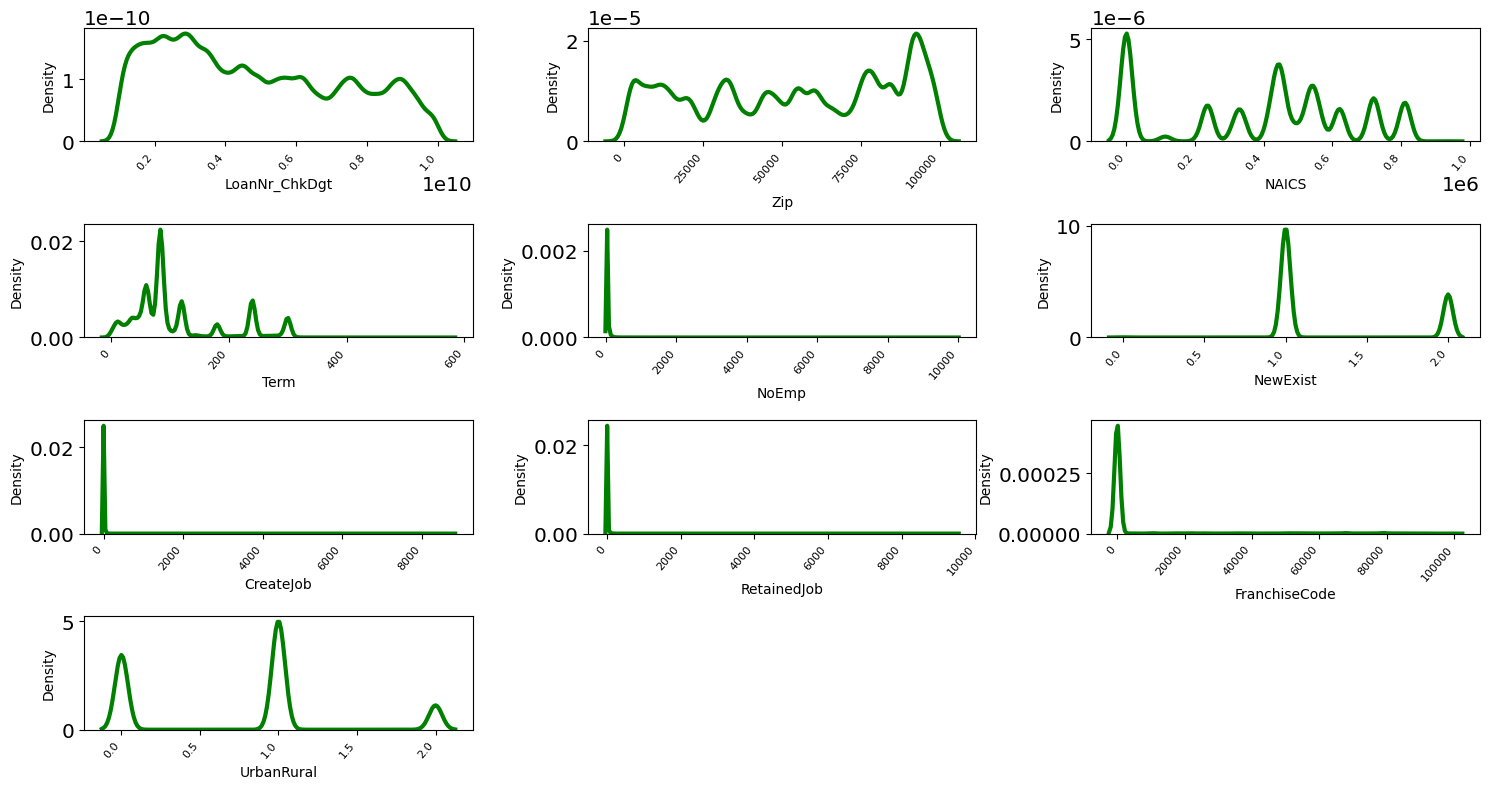

In [ ]:
features = Numerical
plt.figure(figsize=(15,8))

for i in range(0, len(Numerical)):
  plt.subplot(4,3, i+1)
  sns.kdeplot(x=df[features[i]], color='green')
  plt.xlabel(features[i])
  plt.xticks(rotation=50, horizontalalignment='right', fontsize=8)
  plt.tight_layout()



*   Pada feature Term distribusinya skew kanan yg artinya mean > median
*   Pada feature NoEmp, CreateJob, RetainedJob, FranchiseCode distribusinya menempel dekat sumbu y ini disebabkan karna ada outliers, Perlu dilakukan analisa lebih lanjut



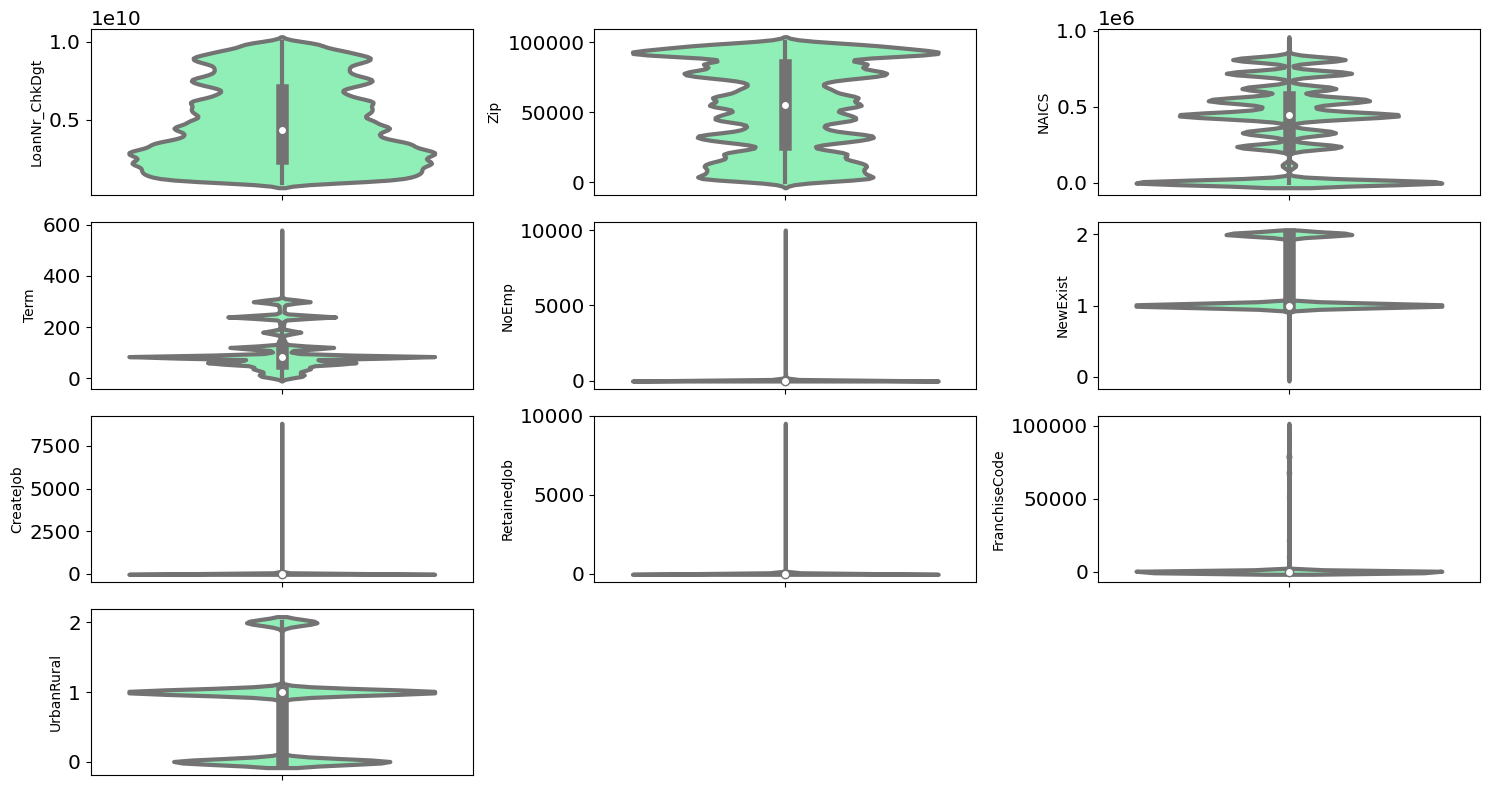

In [ ]:
plt.figure(figsize=(15,8))

for i in range(0, len(Numerical)):
  plt.subplot(4, 3, i+1)
  sns.violinplot(y=df[Numerical[i]], palette='rainbow', orient='v')
  plt.tight_layout()

In [53]:
cat1 = Categorical[0:6]
cat2 = Categorical[6:12]
cat3 = Categorical[12:17]
cat4 = Categorical[17:]

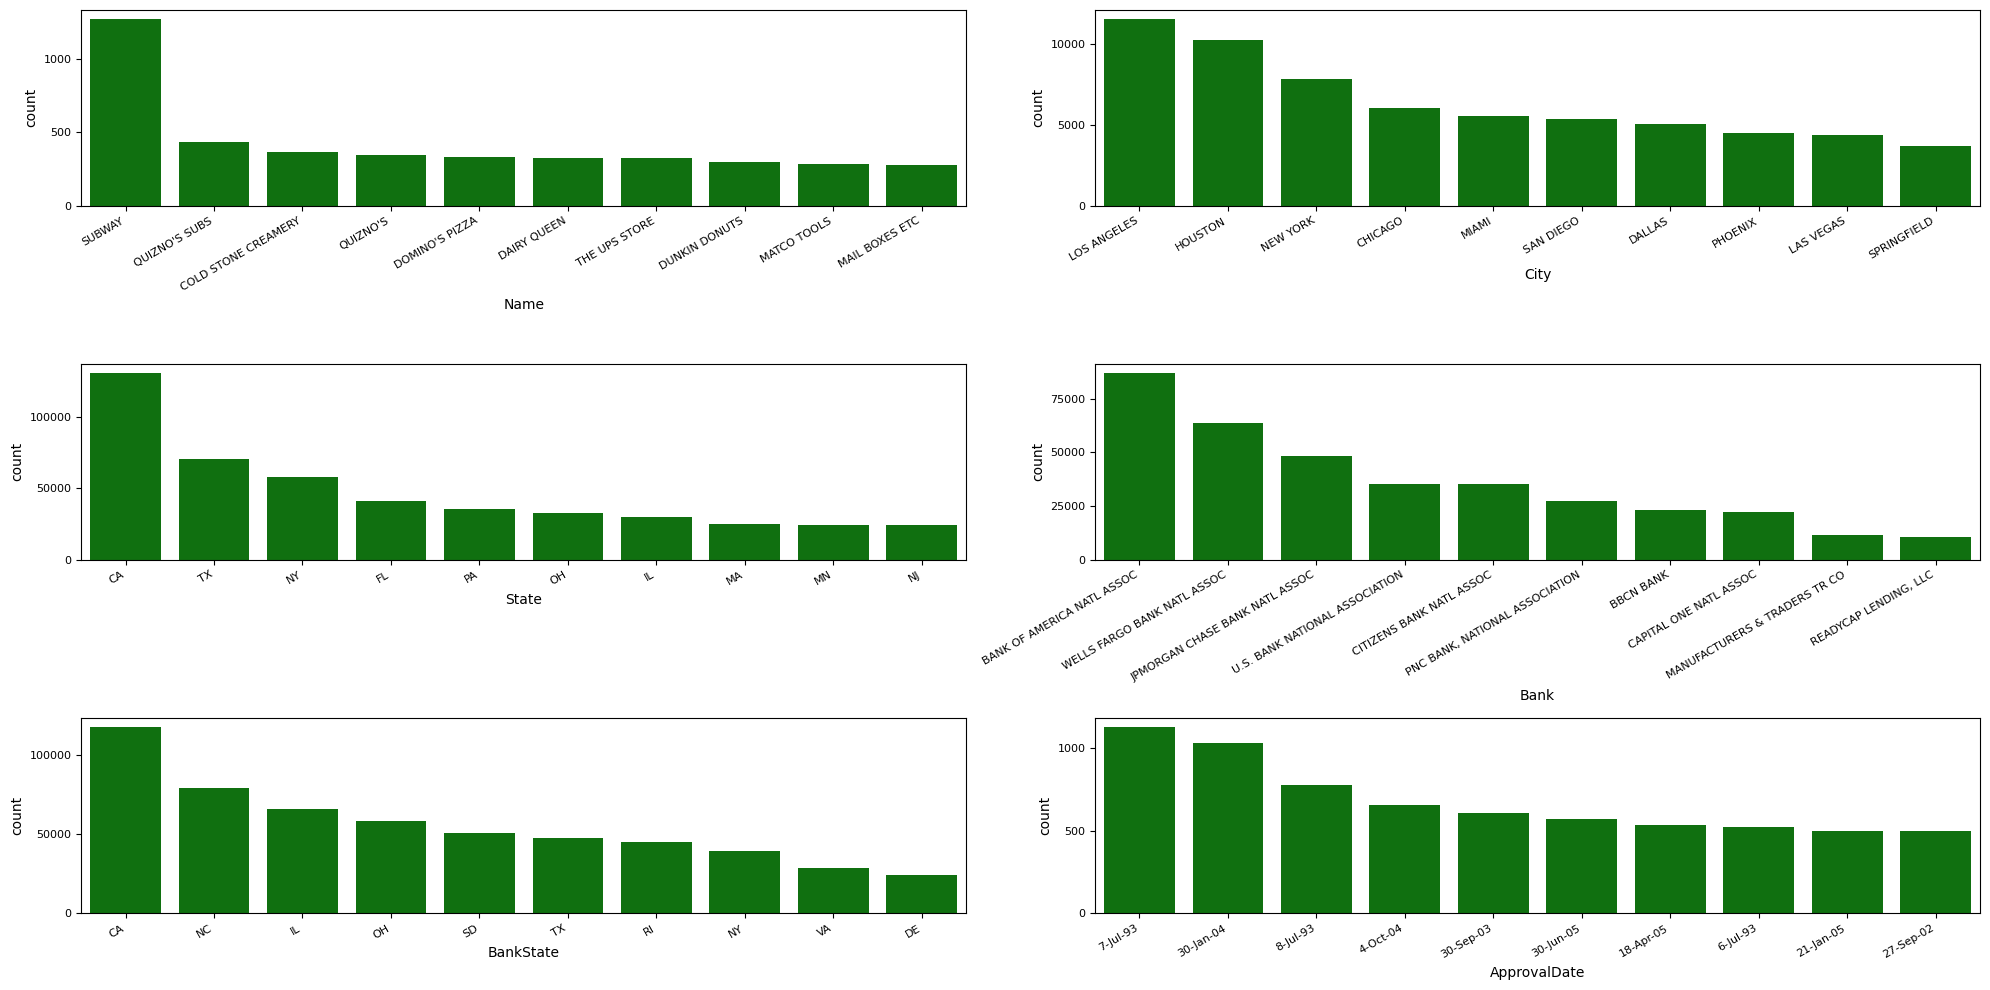

In [54]:
plt.figure(figsize=(20,10))

for i in range(0, len(cat1)):
    top10 = df[cat1[i]].value_counts().nlargest(10).index.tolist()
    cat_order = df[df[cat1[i]].isin(top10)][cat1[i]].value_counts().index.tolist()
    plt.subplot(3, 2, i+1)
    sns.countplot(x=df[df[cat1[i]].isin(top10)][cat1[i]], order=cat_order, color='green', orient='v')
    plt.xticks(rotation=30, horizontalalignment='right', fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()

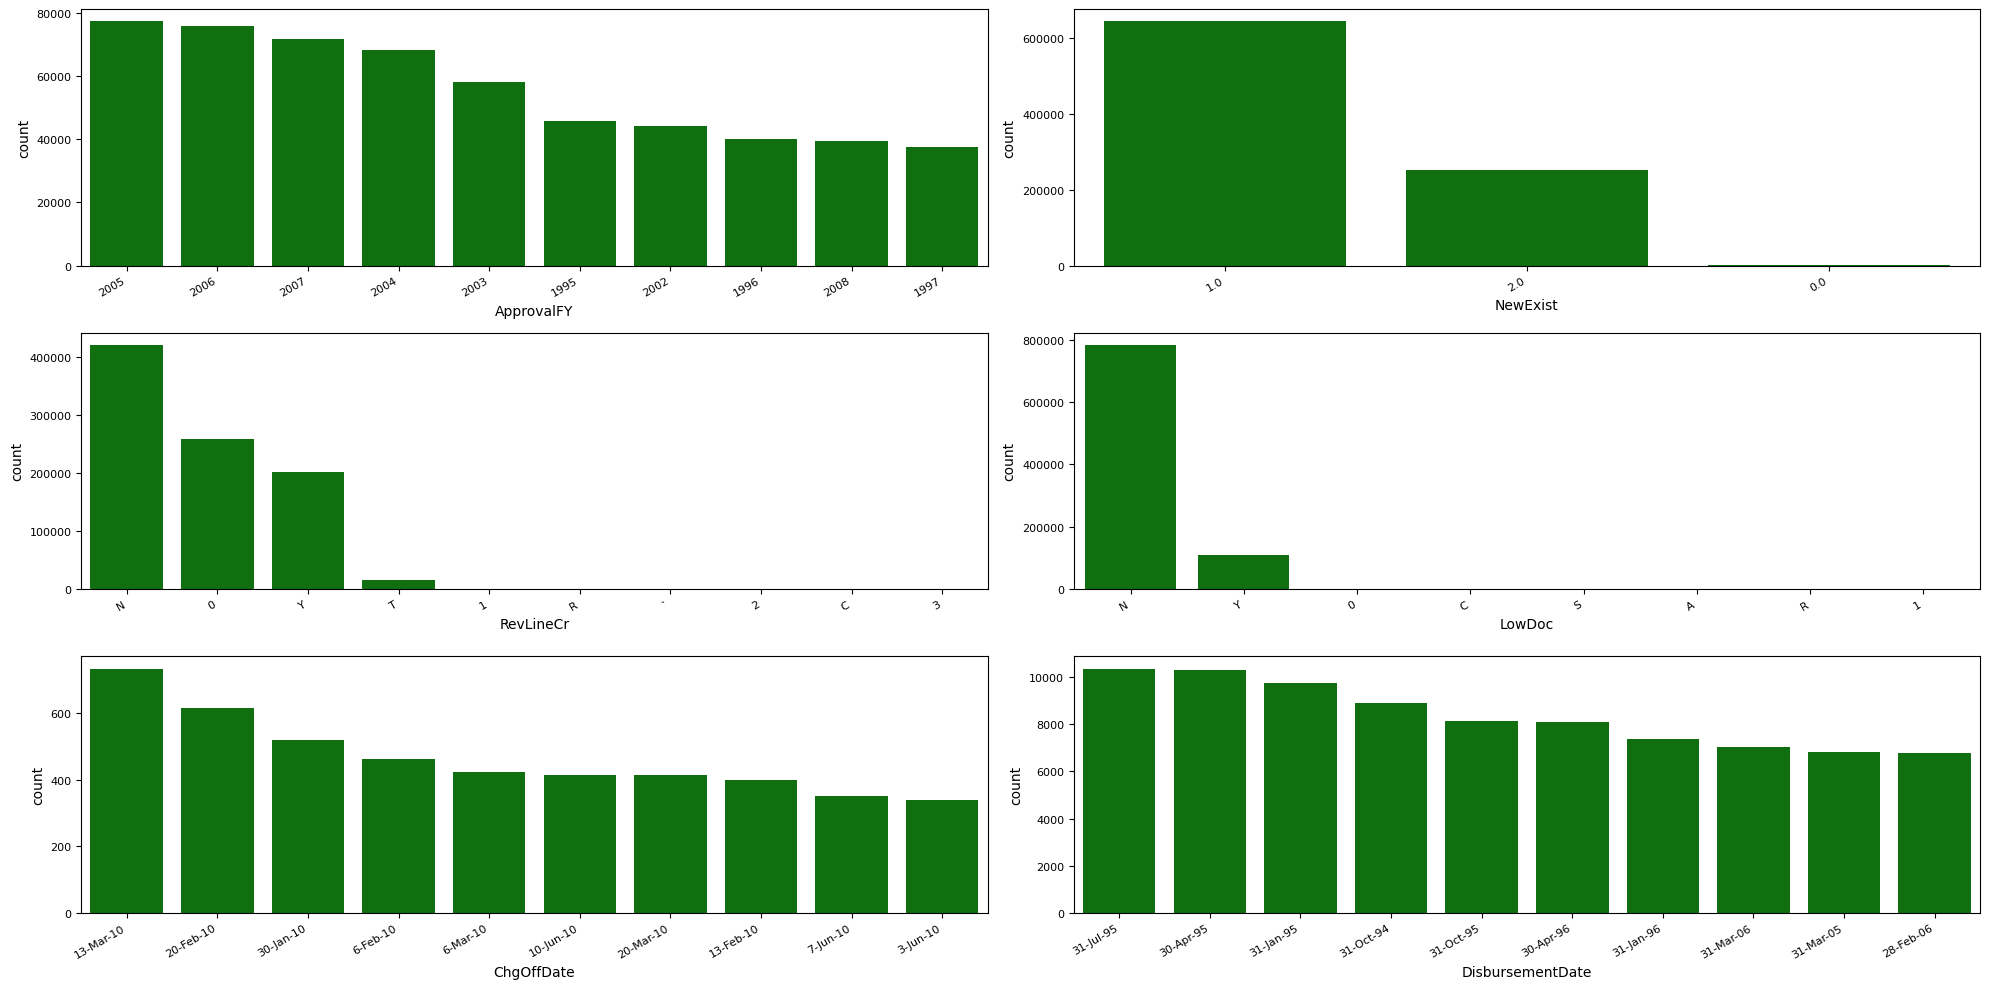

In [55]:
plt.figure(figsize=(20,10))

for i in range(0, len(cat2)):
    top10 = df[cat2[i]].value_counts().nlargest(10).index.tolist()
    cat_order = df[df[cat2[i]].isin(top10)][cat2[i]].value_counts().index.tolist()
    plt.subplot(3, 2, i+1)
    sns.countplot(x=df[df[cat2[i]].isin(top10)][cat2[i]], order=cat_order, color='green', orient='v')
    plt.xticks(rotation=30, horizontalalignment='right', fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()

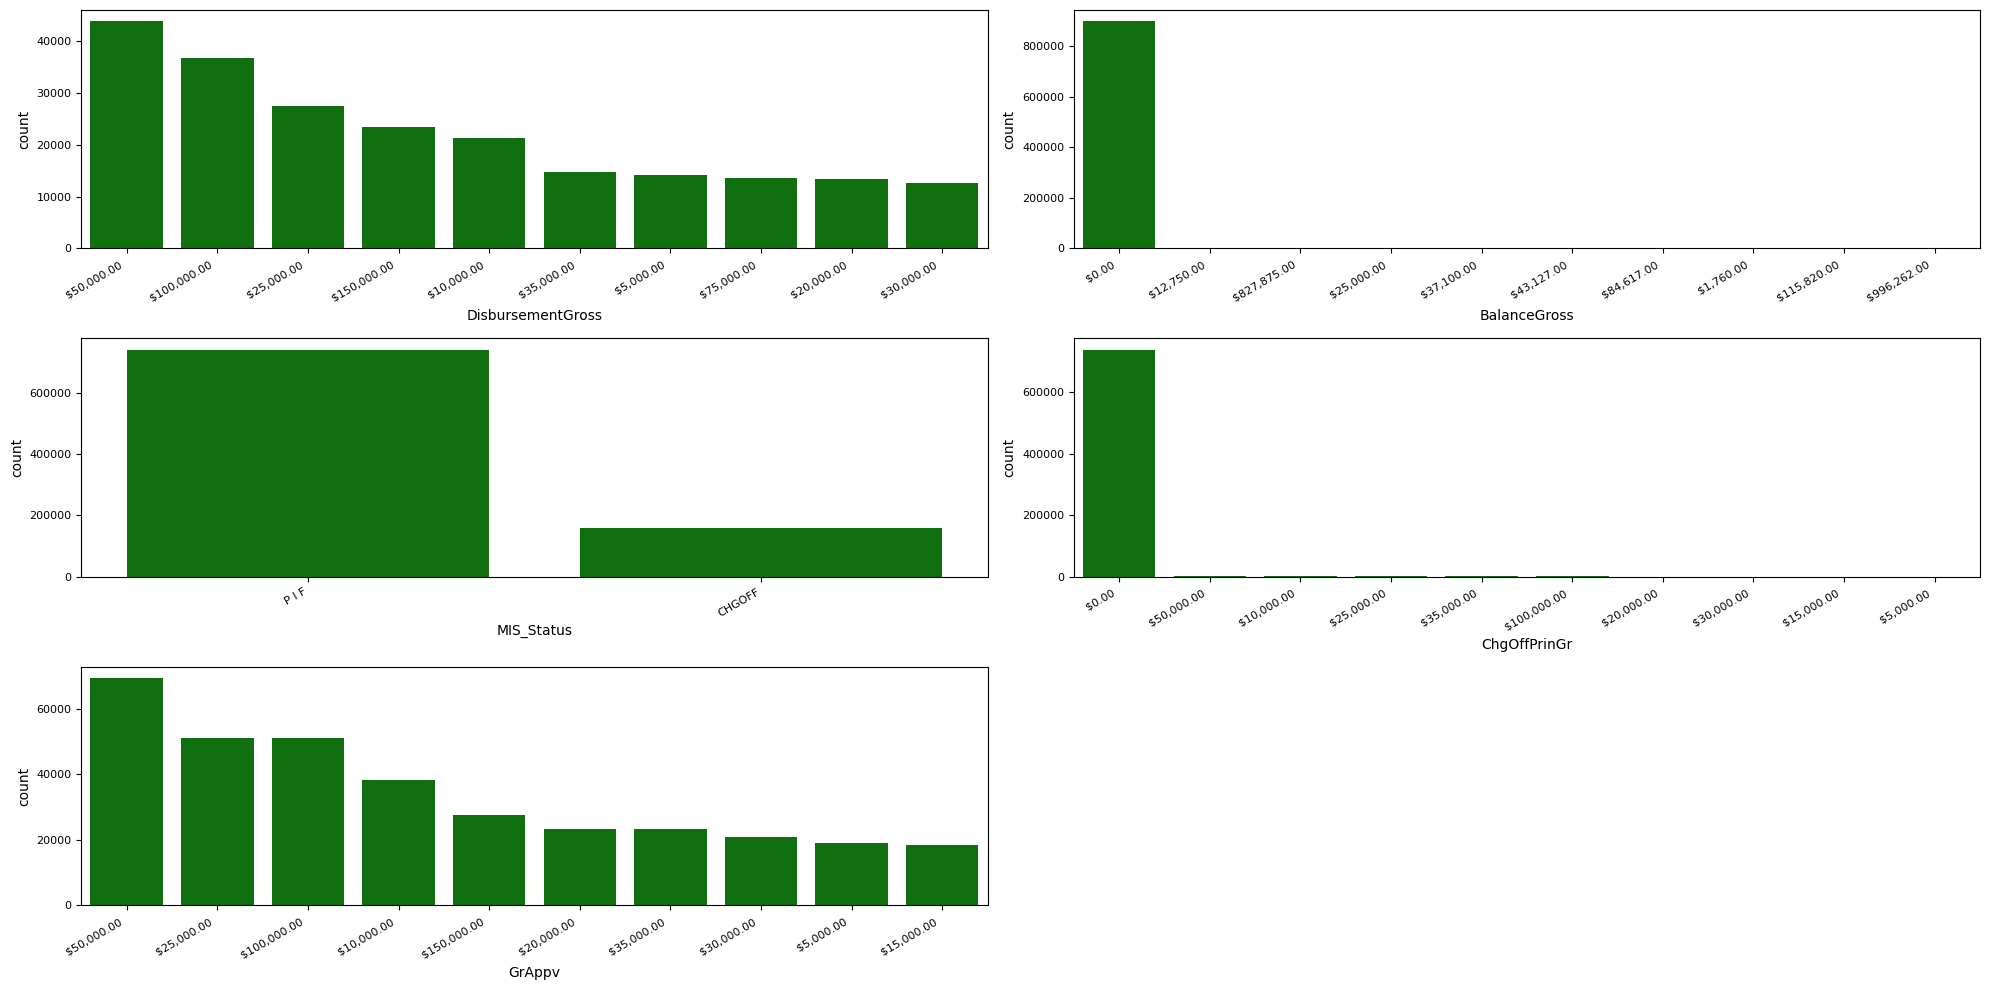

In [56]:
plt.figure(figsize=(20,10))

for i in range(0, len(cat3)):
    top10 = df[cat3[i]].value_counts().nlargest(10).index.tolist()
    cat_order = df[df[cat3[i]].isin(top10)][cat3[i]].value_counts().index.tolist()
    plt.subplot(3, 2, i+1)
    sns.countplot(x=df[df[cat3[i]].isin(top10)][cat3[i]], order=cat_order, color='green', orient='v')
    plt.xticks(rotation=30, horizontalalignment='right', fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()

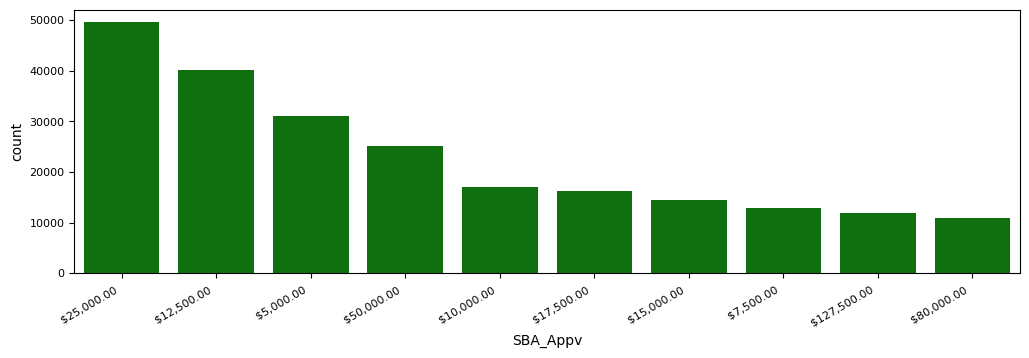

In [57]:
plt.figure(figsize=(20,10))

for i in range(0, len(cat4)):
    top10 = df[cat4[i]].value_counts().nlargest(10).index.tolist()
    cat_order = df[df[cat4[i]].isin(top10)][cat4[i]].value_counts().index.tolist()
    plt.subplot(3, 2, i+1)
    sns.countplot(x=df[df[cat4[i]].isin(top10)][cat4[i]], order=cat_order, color='green', orient='v')
    plt.xticks(rotation=30, horizontalalignment='right', fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()

* Pada feature **LowDoc, NewExist, dan MIS_Status** terdapat 2 unique value
* Jumlah peminjam paling banyak berada di **State CA**

## Multivariate Analysis

In [ ]:
## Heatmap
df[Numerical].corr()

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
LoanNr_ChkDgt,1.000000,0.027956,-0.060822,0.099793,0.009032,-0.040024,-0.022095,-0.023463,0.046296,-0.148337
Zip,0.027956,1.000000,-0.034026,0.146074,0.014157,-0.038853,0.003632,0.003674,0.011398,-0.072798
NAICS,-0.060822,-0.034026,1.000000,-0.111024,-0.038237,0.047053,-0.039376,-0.036587,0.027800,0.436724
Term,0.099793,0.146074,-0.111024,1.000000,0.046140,-0.073100,0.027581,0.024931,0.028940,-0.204080
NoEmp,0.009032,0.014157,-0.038237,0.046140,1.000000,-0.040222,0.008626,0.015350,0.006376,-0.041824
NewExist,-0.040024,-0.038853,0.047053,-0.073100,-0.040222,1.000000,-0.002130,-0.009128,0.124152,0.031701
CreateJob,-0.022095,0.003632,-0.039376,0.027581,0.008626,-0.002130,1.000000,0.993953,0.001038,-0.029924
RetainedJob,-0.023463,0.003674,-0.036587,0.024931,0.015350,-0.009128,0.993953,1.000000,-0.000515,-0.024851
FranchiseCode,0.046296,0.011398,0.027800,0.028940,0.006376,0.124152,0.001038,-0.000515,1.000000,-0.003776
UrbanRural,-0.148337,-0.072798,0.436724,-0.204080,-0.041824,0.031701,-0.029924,-0.024851,-0.003776,1.000000


<Axes: >

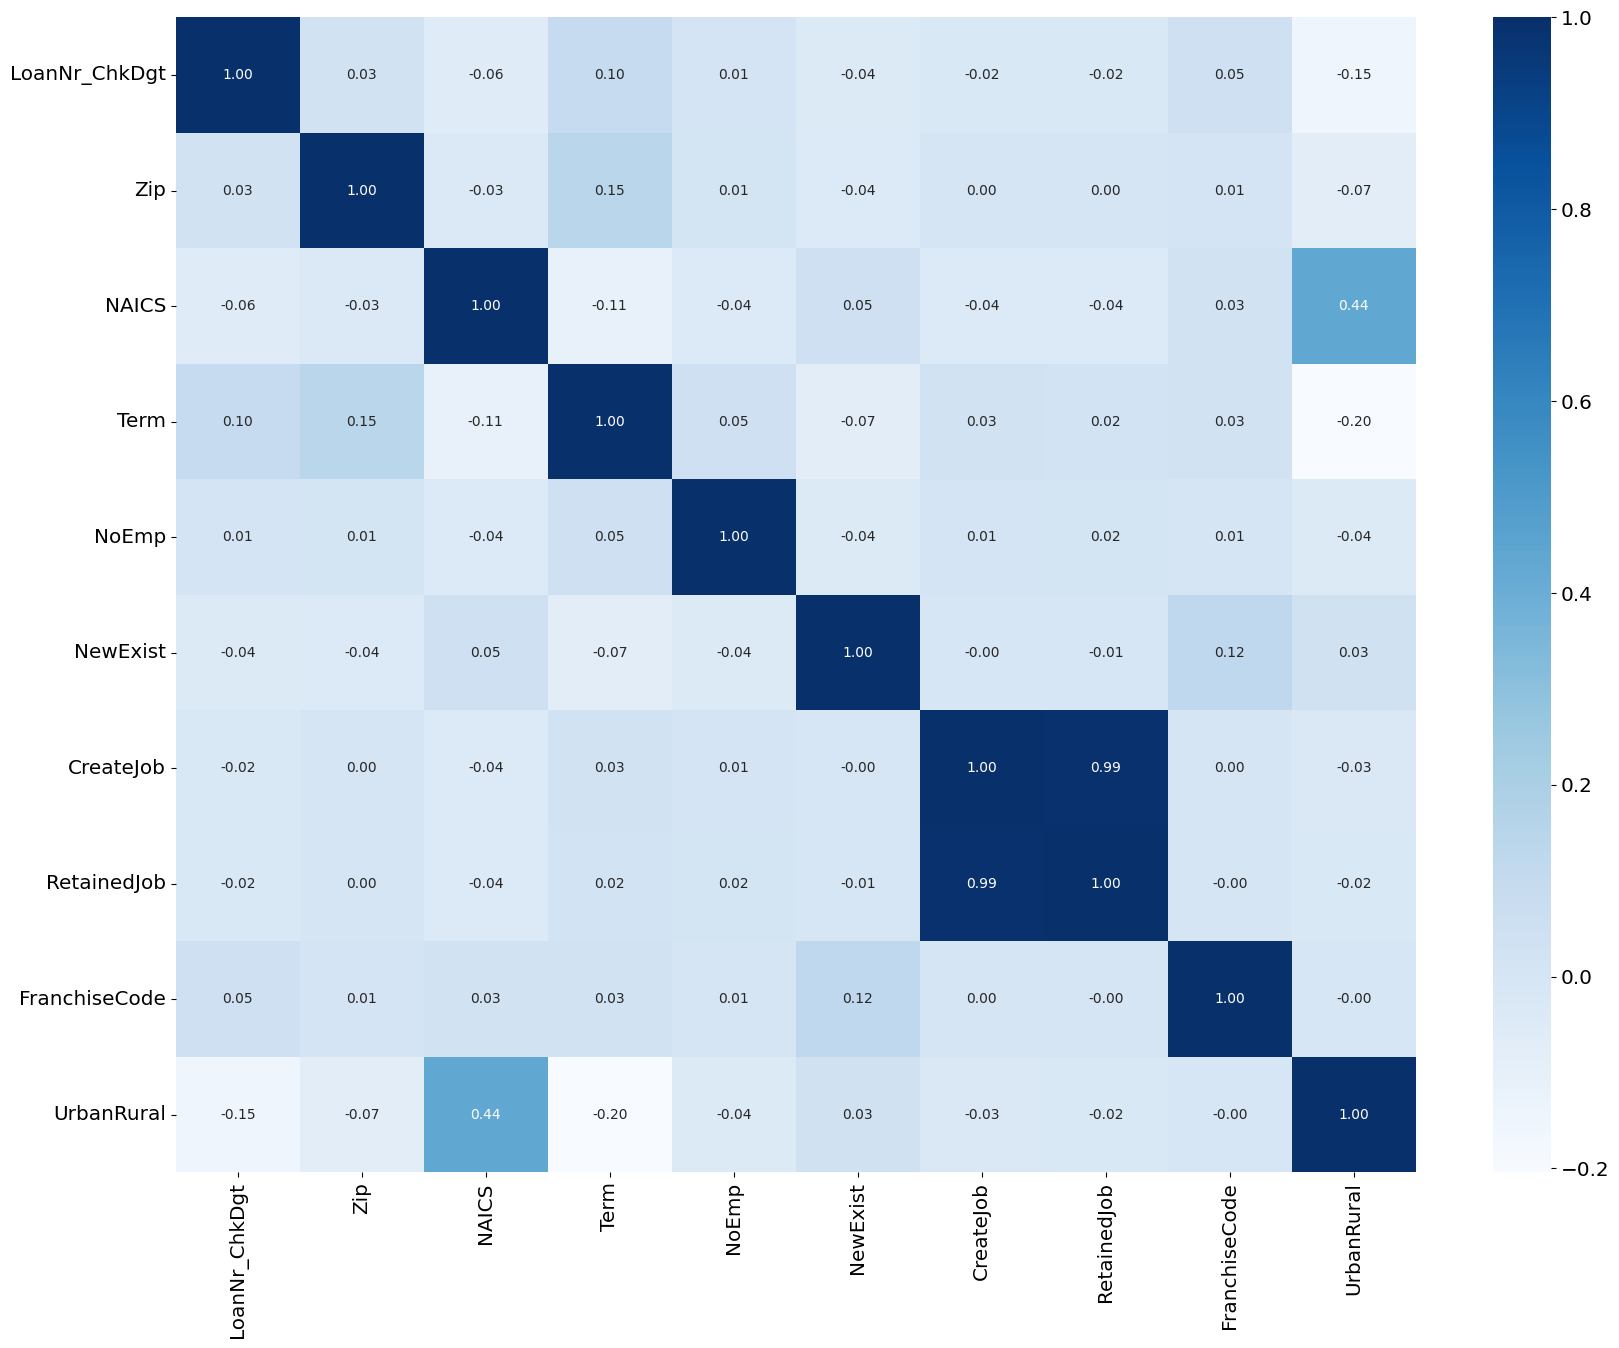

In [ ]:
plt.figure(figsize=(20,15))

sns.heatmap(df[Numerical].corr(), cmap='Blues', annot=True, fmt='.2f')

Dari corelation heatmap
*   Feature **CreateJob** memiliki korelasi positif yang sangat kuat dengan **RetainedJob** yaitu **0.99**, ada kemungkinan kedua feature ini redundan. Sehingga kita dapat memilih salah satu saja.



<Figure size 2000x1500 with 0 Axes>

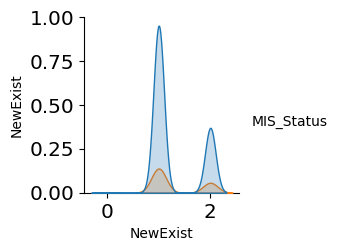

In [ ]:
plt.figure(figsize=(20,15))

df_sample = df[Categorical].sample(2000, random_state=42)
sns.pairplot(df_sample, diag_kind='kde', hue='MIS_Status')

<Figure size 2000x1500 with 0 Axes>

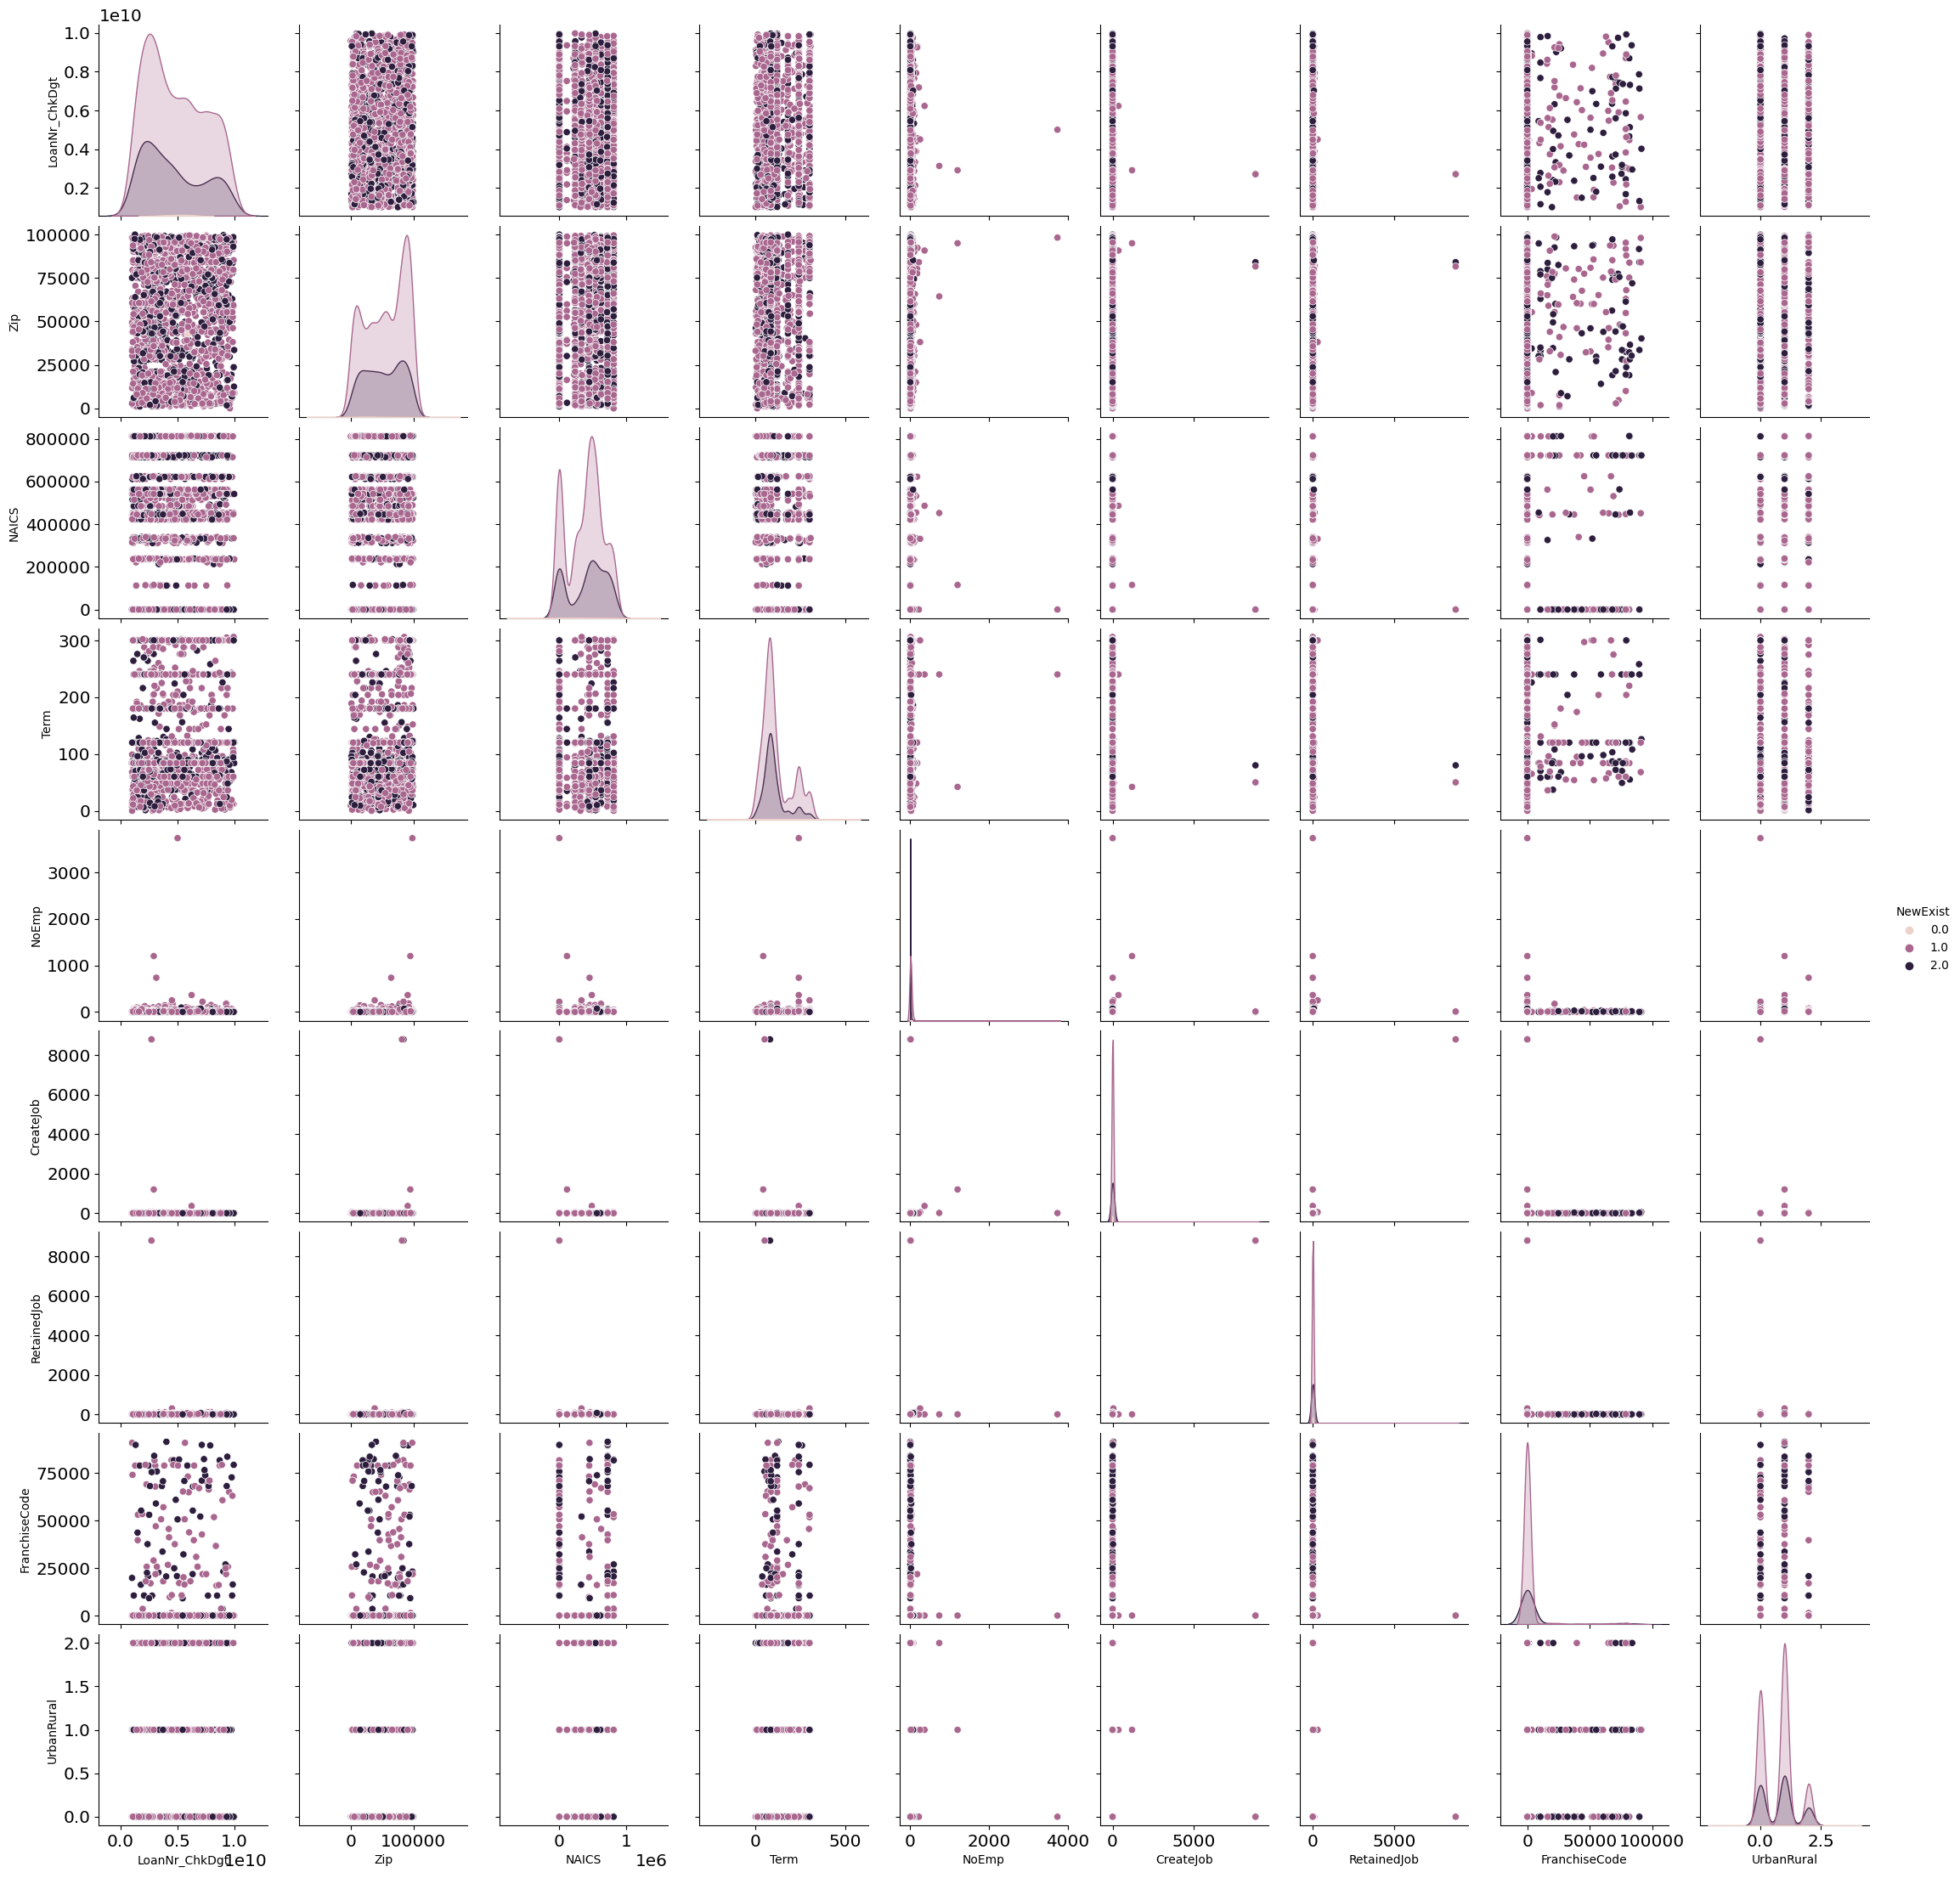

In [ ]:
plt.figure(figsize=(20,15))

df_sample = df[Numerical].sample(2000, random_state=42)
sns.pairplot(df_sample, diag_kind='kde', hue='NewExist')

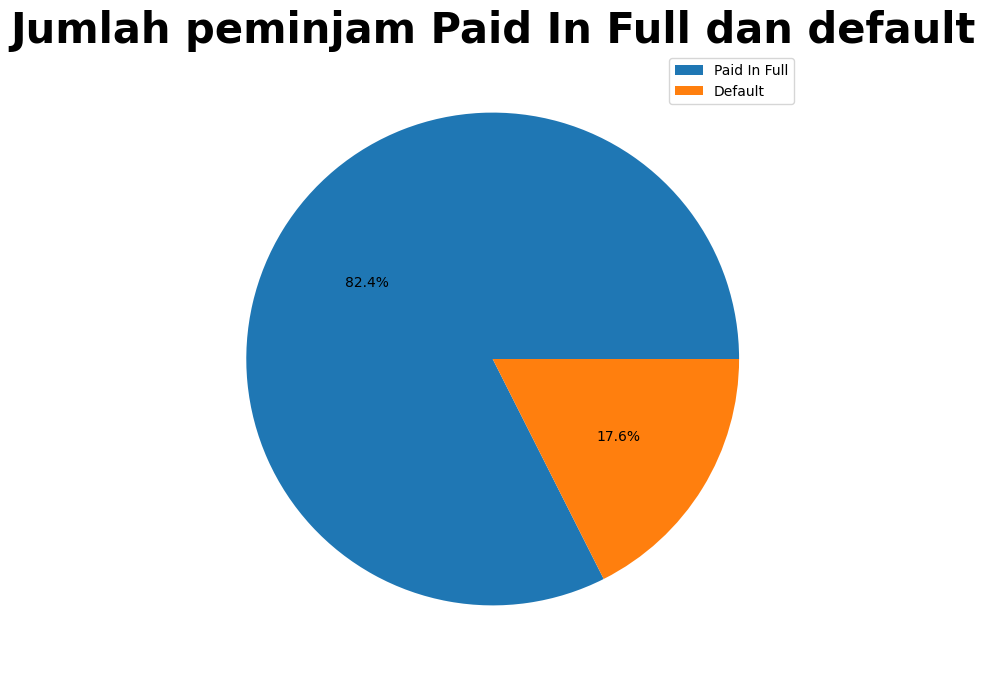

In [49]:
fig = plt.figure(figsize=(10,8))

plt.pie(pd.Series(df['MIS_Status']).value_counts(), autopct='%1.1f%%')
plt.title('Jumlah peminjam Paid In Full dan default', color='black', fontsize=30, fontweight='bold')
plt.legend(['Paid In Full', 'Default'])

In [ ]:
## jumlah peminjam berdasarkan NAICS

df_naics1 = df.groupby(['NAICS', 'MIS_Status'])['LoanNr_ChkDgt'].nunique().reset_index(name='UniqueCustomer')
df_naics2 = df.groupby(['NAICS'])['LoanNr_ChkDgt'].nunique().reset_index(name='AllUniqueCustomer')

df_naics = df_naics1.merge(df_naics2, how='inner', on='NAICS')
df_naics['PercentagesUniqueCustomer(%)']=round(df_naics['UniqueCustomer']*100/df_naics['AllUniqueCustomer'],2)
df_naics

,NAICS,MIS_Status,UniqueCustomer,AllUniqueCustomer,PercentagesUniqueCustomer(%)
0,0,CHGOFF,16799,201948,8.32
1,0,P I F,184868,201948,91.54
2,111110,CHGOFF,1,32,3.12
3,111110,P I F,31,32,96.88
4,111120,P I F,3,3,100.00
...,...,...,...,...,...
2509,926150,P I F,10,10,100.00
2510,927110,CHGOFF,1,1,100.00
2511,928110,P I F,4,4,100.00
2512,928120,CHGOFF,5,32,15.62


Text(3, 103, 'NAICS dengan peminjam paling banyak berasal dari')

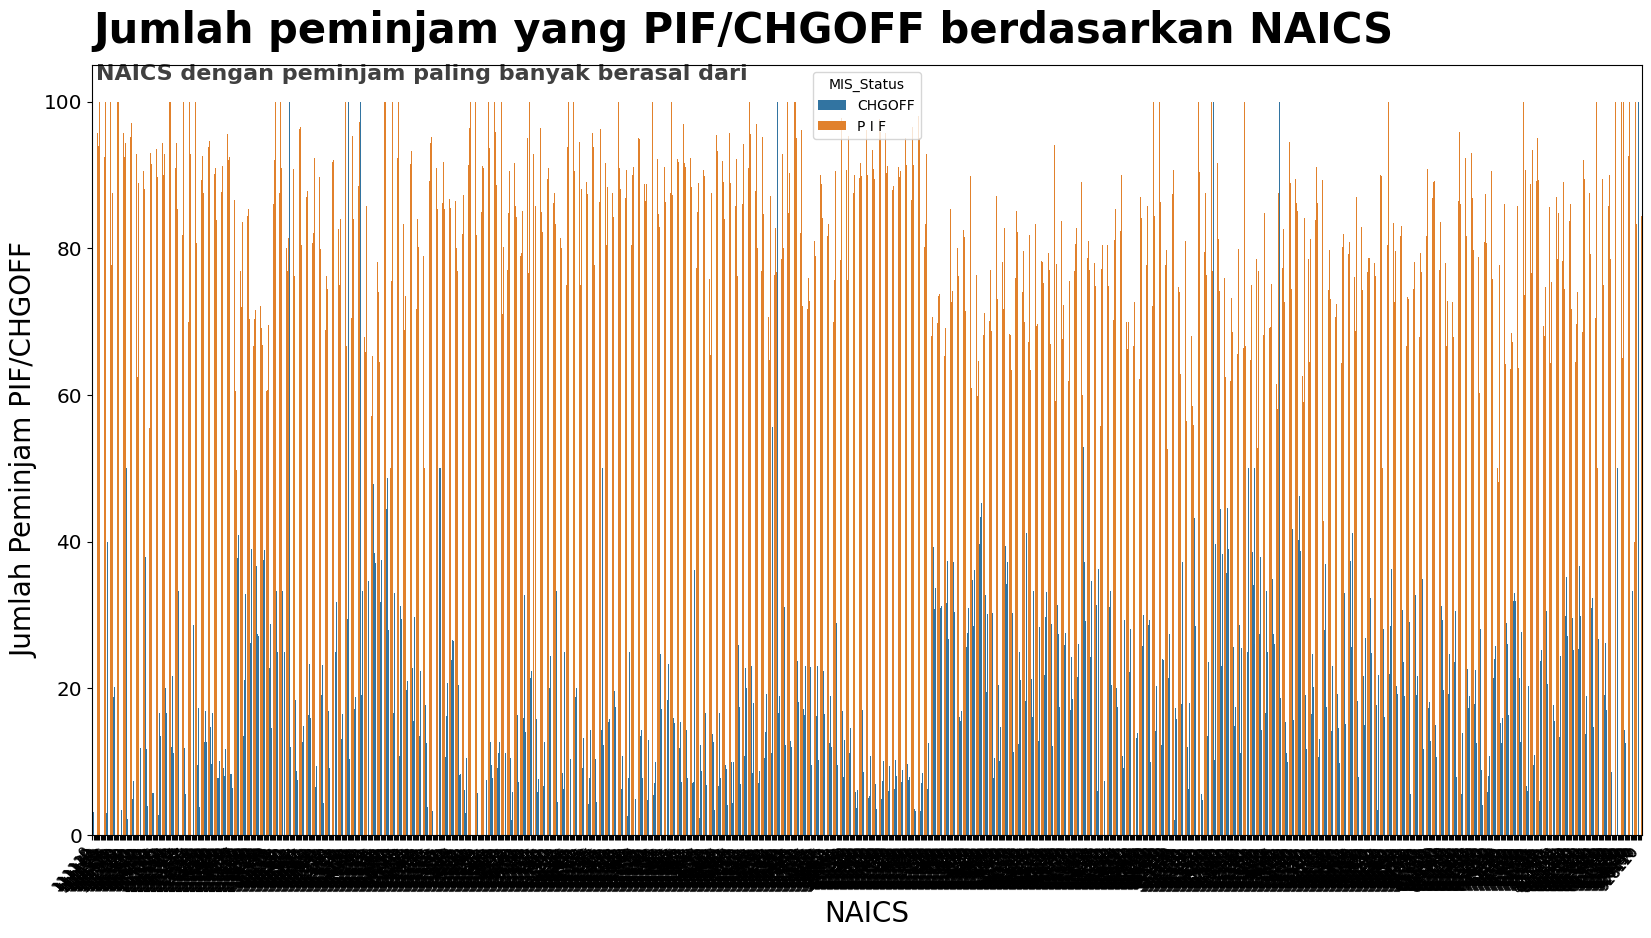

In [ ]:
plt.figure(figsize=(20,10))

plotting = sns.barplot(x='NAICS', y='PercentagesUniqueCustomer(%)', hue='MIS_Status', data=df_naics)

plt.ylabel('Jumlah Peminjam PIF/CHGOFF', fontsize=20)
plt.xlabel('NAICS', fontsize=20)
plt.xticks(rotation=50, horizontalalignment='right', fontsize=10)

plotting.text(0.5, 108, 'Jumlah peminjam yang PIF/CHGOFF berdasarkan NAICS', color='black', fontsize=30, fontweight='bold')
plotting.text(3, 103, 'NAICS dengan peminjam paling banyak berasal dari', fontsize=16, fontweight='bold', alpha=.75)

In [ ]:
df_state1 = df.groupby(['State', 'MIS_Status'])['LoanNr_ChkDgt'].nunique().reset_index(name='UniqueCustomerState')
df_state2 = df.groupby(['State'])['LoanNr_ChkDgt'].nunique().reset_index(name='AllUniqueCustomerState')

df_state = df_state1.merge(df_state2, how='inner', on='State')
df_state['PercentagesUniqueCustomer'] = round(df_state['UniqueCustomerState']*100/df_state['AllUniqueCustomerState'],2)
df_state

,State,MIS_Status,UniqueCustomerState,AllUniqueCustomerState,PercentagesUniqueCustomer
0,AK,CHGOFF,281,2405,11.68
1,AK,P I F,2122,2405,88.23
2,AL,CHGOFF,1389,8362,16.61
3,AL,P I F,6971,8362,83.37
4,AR,CHGOFF,1064,6341,16.78
...,...,...,...,...,...
97,WI,P I F,18461,21040,87.74
98,WV,CHGOFF,530,3287,16.12
99,WV,P I F,2755,3287,83.82
100,WY,CHGOFF,199,2839,7.01


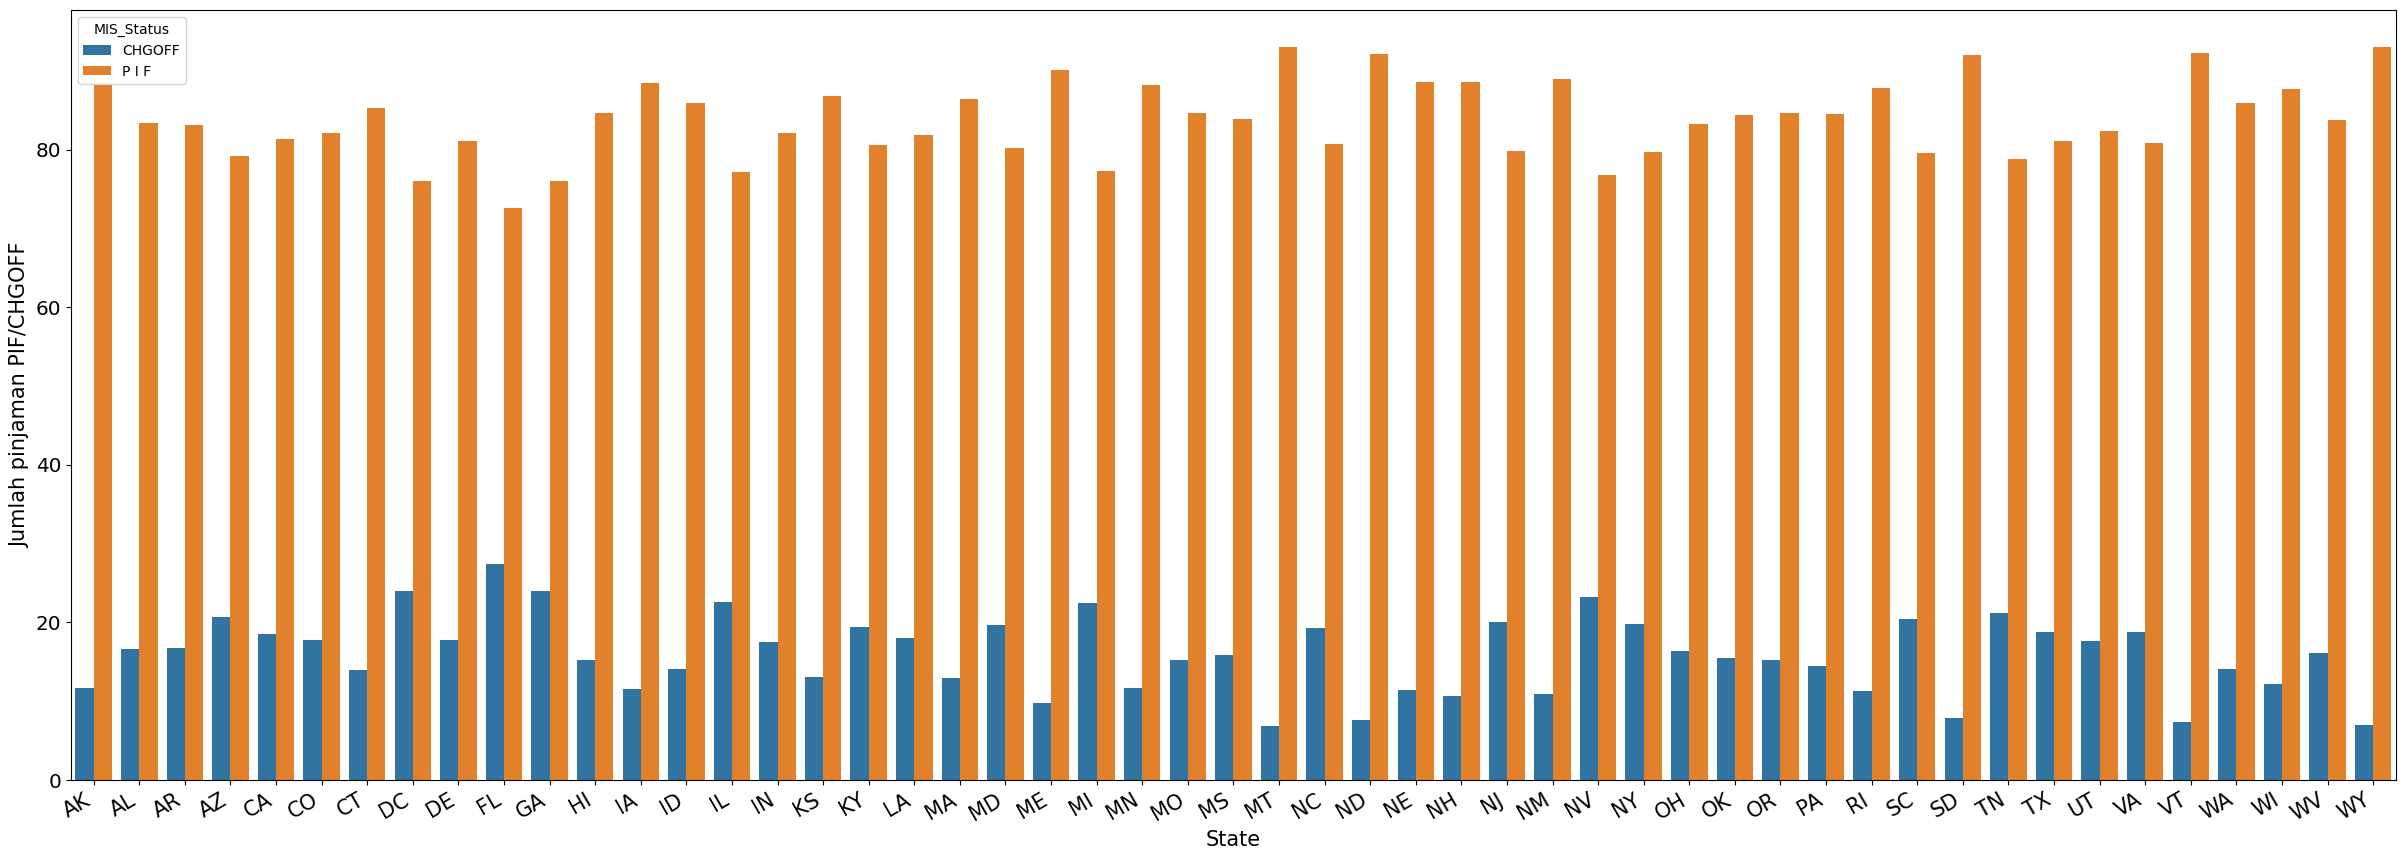

In [ ]:
plt.figure(figsize=(30,10))

plotting = sns.barplot(x='State', y='PercentagesUniqueCustomer', hue='MIS_Status', data=df_state)

plt.ylabel('Jumlah pinjaman PIF/CHGOFF', fontsize=15)
plt.xlabel('State', fontsize=15)
plt.xticks(rotation=30, horizontalalignment='right', fontsize=15)

plt.show()

In [ ]:
df_copy = df.copy()

In [ ]:
## Memisahkan kolom ApprovalDate, ChgOffDate, DisbursementDate berdasarkan tahun, bulan, hari

df_copy[['ApprovalDate', 'ChgOffDate', 'DisbursementDate']]=df_copy[['ApprovalDate', 'ChgOffDate', 'DisbursementDate']].apply(pd.to_datetime)
df_copy.sample(1)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
545458,5350314008,BOB'S AUTOMOTIVE MACHINE INC,NORTH KANSAS CITY,MO,64116,BANK OF AMERICA NATL ASSOC,NC,811111,2002-04-19,2002,60,2,1.0,1,2,1,1,0,N,NaT,2002-04-30,"$27,000.00",$0.00,P I F,$0.00,"$27,000.00","$13,500.00"


In [ ]:
df_copy['ApprovalYear'] = pd.DatetimeIndex(df_copy['ApprovalDate']).year
print(df_copy['ApprovalYear'].min())
print(df_copy['ApprovalYear'].max())

1973
2072


In [ ]:
df_copy['ApprovalMonth'] = pd.DatetimeIndex(df_copy['ApprovalDate']).month
print(df_copy['ApprovalMonth'].min())
print(df_copy['ApprovalMonth'].max())

1
12


In [ ]:
df_copy['ApprovalDay'] = pd.DatetimeIndex(df_copy['ApprovalDate']).day
print(df_copy['ApprovalDay'].min())
print(df_copy['ApprovalDay'].max())

1
31


In [ ]:
df_copy[['ApprovalYear', 'ApprovalMonth', 'ApprovalDay']].sample(5)

,ApprovalYear,ApprovalMonth,ApprovalDay
523674,2012,2,14
632591,2003,4,30
552670,2002,5,29
442641,1990,11,7
175437,2007,2,1


In [ ]:
df_copy['ChgOffYear'] = pd.DatetimeIndex(df_copy['ChgOffDate']).year
print(df_copy['ChgOffYear'].min())
print(df_copy['ChgOffYear'].max())

1988.0
2026.0


In [ ]:
df_copy['ChgOffMonth'] = pd.DatetimeIndex(df_copy['ChgOffDate']).month
print(df_copy['ChgOffMonth'].min())
print(df_copy['ChgOffMonth'].max())

1.0
12.0


In [ ]:
df_copy['ChgOffDay'] = pd.DatetimeIndex(df_copy['ChgOffDate']).day
print(df_copy['ChgOffDay'].min())
print(df_copy['ChgOffDay'].max())

1.0
31.0


In [ ]:
df_copy[['ChgOffYear', 'ChgOffMonth', 'ChgOffDay']].sample(5)

,ChgOffYear,ChgOffMonth,ChgOffDay
25238,2007.0,2.0,13.0
465155,NaN,NaN,NaN
885001,NaN,NaN,NaN
818313,NaN,NaN,NaN
208900,NaN,NaN,NaN


In [ ]:
df_copy['DisbursementYear'] = pd.DatetimeIndex(df_copy['DisbursementDate']).year
print(df_copy['DisbursementYear'].min())
print(df_copy['DisbursementYear'].max())

1973.0
2072.0


In [ ]:
df_copy['DisbursementMonth'] = pd.DatetimeIndex(df_copy['DisbursementDate']).month
print(df_copy['DisbursementMonth'].min())
print(df_copy['DisbursementMonth'].max())

1.0
12.0


In [ ]:
df_copy['DisbursementDay'] = pd.DatetimeIndex(df_copy['DisbursementDate']).day
print(df_copy['DisbursementDay'].min())
print(df_copy['DisbursementDay'].max())

1.0
31.0


In [ ]:
df_copy[['DisbursementYear', 'DisbursementMonth', 'DisbursementDay']].sample(5)

,DisbursementYear,DisbursementMonth,DisbursementDay
403218,2000.0,8.0,31.0
458075,1992.0,1.0,31.0
57661,2005.0,9.0,30.0
514642,1992.0,10.0,31.0
498101,1992.0,7.0,31.0


In [ ]:
df_copy[['DisbursementYear', 'ChgOffYear', 'ApprovalYear']].sort_values('ApprovalYear', ascending=True).tail(10)

,DisbursementYear,ChgOffYear,ApprovalYear
193984,2072.0,1990.0,2072
139685,NaN,1990.0,2072
22806,2072.0,1989.0,2072
24820,2072.0,1989.0,2072
183321,2072.0,1994.0,2072
87268,2072.0,1988.0,2072
2005,2072.0,1990.0,2072
140183,NaN,1991.0,2072
24825,2072.0,1989.0,2072
351233,2072.0,1990.0,2072


Setelah dilakukan analisis, untuk tanggal dan bulan dari setiap feature **'Date'** tidak ada kesalahan. Tetapi, pada bagian **'Year'** ada kejanggalan pada **'DisbursementYear'** dan **'ApprovalYear'** nilai max nya adalah 2072 tetapi dalam beberapa data **'ChgOffYear'** nya adalah 1988 dimana hal ini tidak masuk akal.

In [ ]:
## Mengubah kolom DisbursementGross, BalanceGross, ChgOffPrinGr, GrAppv, SBA_appv menjadi float karna merupakan nominal angka

df_copy[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].head()

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,"$60,000.00",$0.00,$0.00,"$60,000.00","$48,000.00"
1,"$40,000.00",$0.00,$0.00,"$40,000.00","$32,000.00"
2,"$287,000.00",$0.00,$0.00,"$287,000.00","$215,250.00"
3,"$35,000.00",$0.00,$0.00,"$35,000.00","$28,000.00"
4,"$229,000.00",$0.00,$0.00,"$229,000.00","$229,000.00"


In [ ]:
df_copy[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']]=df_copy[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].applymap(lambda x: x.replace('$', '').replace(',',''))
df_copy = df_copy.astype({'DisbursementGross':'float', 'BalanceGross':'float', 'ChgOffPrinGr':'float', 'GrAppv':'float', 'SBA_Appv':'float'})
df_copy[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].head()

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,60000.0,0.0,0.0,60000.0,48000.0
1,40000.0,0.0,0.0,40000.0,32000.0
2,287000.0,0.0,0.0,287000.0,215250.0
3,35000.0,0.0,0.0,35000.0,28000.0
4,229000.0,0.0,0.0,229000.0,229000.0


In [ ]:
df_set1 = df_copy.groupby('ChgOffYear').agg({'LoanNr_ChkDgt':'count',
                                             'DisbursementGross': 'mean',
                                             'ChgOffPrinGr':'mean',
                                             'Term': 'mean',
                                             'SBA_Appv': 'mean'
                                            }).reset_index()
df_set1

,ChgOffYear,LoanNr_ChkDgt,DisbursementGross,ChgOffPrinGr,Term,SBA_Appv
0,1988.0,355,152488.400000,84590.447887,102.002817,133333.521127
1,1989.0,1541,166895.443219,98059.518494,97.850746,145578.592472
2,1990.0,1611,181243.974550,99584.142148,94.554935,156259.957169
3,1991.0,2257,184024.498449,106913.258751,91.367302,156855.688968
4,1992.0,788,189235.713198,98346.003807,97.838832,163244.389594
5,1993.0,646,206175.883901,99060.962848,98.292570,173879.673375
6,1994.0,505,218114.883168,107390.849505,103.572277,182771.706931
7,1995.0,395,213654.878481,101071.572152,102.341772,176524.425316
8,1996.0,522,222864.392720,112831.314176,108.664751,183646.886973
9,1997.0,638,212352.548589,100494.210031,99.321317,175492.873041


In [ ]:
df_set1['DisbursementGross'].mean()

173178.09091139215

In [ ]:
df_set1['ChgOffPrinGr'].mean()

97157.3208104407

In [ ]:
df_set1['Term'].max()

108.66475095785441

In [ ]:
df_set1['SBA_Appv'].mean()

131248.47855864055